## Praca domowa 4

#### Autor: Jan Krężel

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

In [3]:
df.loc[(df.Year > 2015) & (df.Publisher == "Nintendo") & (df.NA_Sales < df.EU_Sales)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


b) Jak rodzaj gry zarobił najwięcej w roku 2010?

In [8]:
df.loc[df.Year == 2010].groupby("Genre")["Global_Sales"].sum().idxmax()

'Action'

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [37]:
df2 = df.groupby("Genre")[["JP_Sales", "EU_Sales"]].agg(np.mean).reset_index()
df2[df2.JP_Sales > df2.EU_Sales] \
    .drop(columns="EU_Sales") \
    .rename(columns={"JP_Sales":"Średnia sprzedaż w Japonii", "Genre":"Typ gry"})\
    .sort_values(by="Średnia sprzedaż w Japonii", ascending=False).reset_index(drop=True)

,Typ gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

In [39]:
from IPython.display import Image

## Oryginał
[Źródło](https://www.youtube.com/watch?v=orakE9t1tpo&t=213s&ab_channel=Vox)

Poprawiany wykres

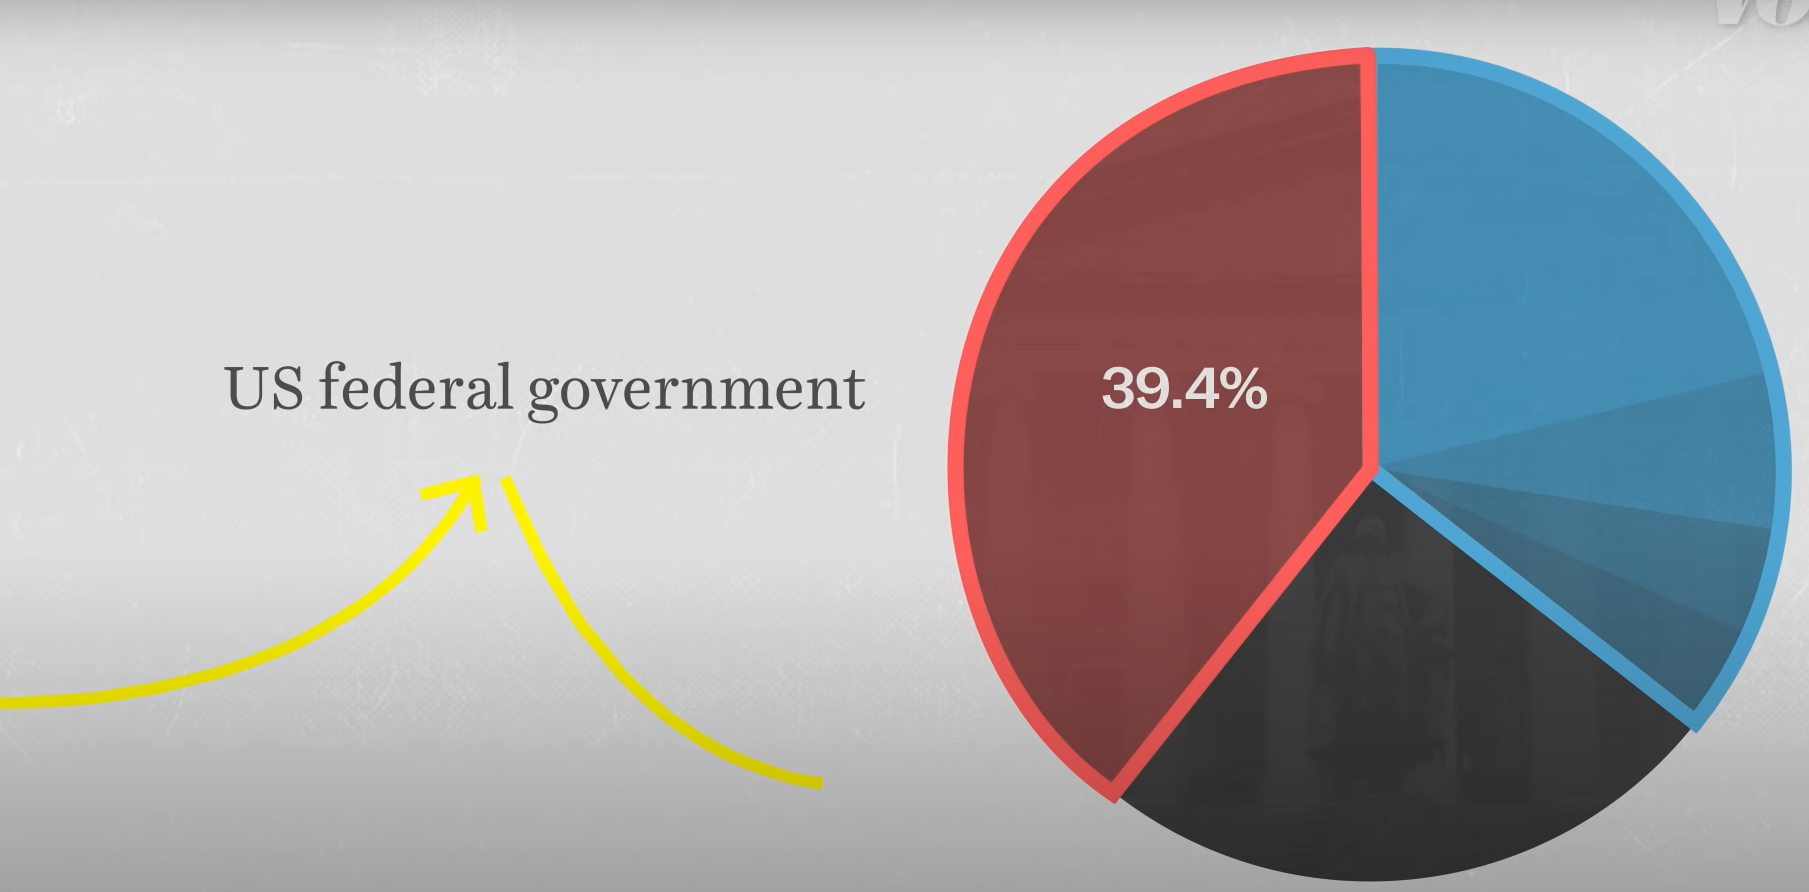

In [44]:
Image(filename="vox_pie.png", width=900, height=450)

## Wersja ggplot2
[Źródło](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/KrezelJan)

Wykres poprawiony z wykorzystaniem ggplot2

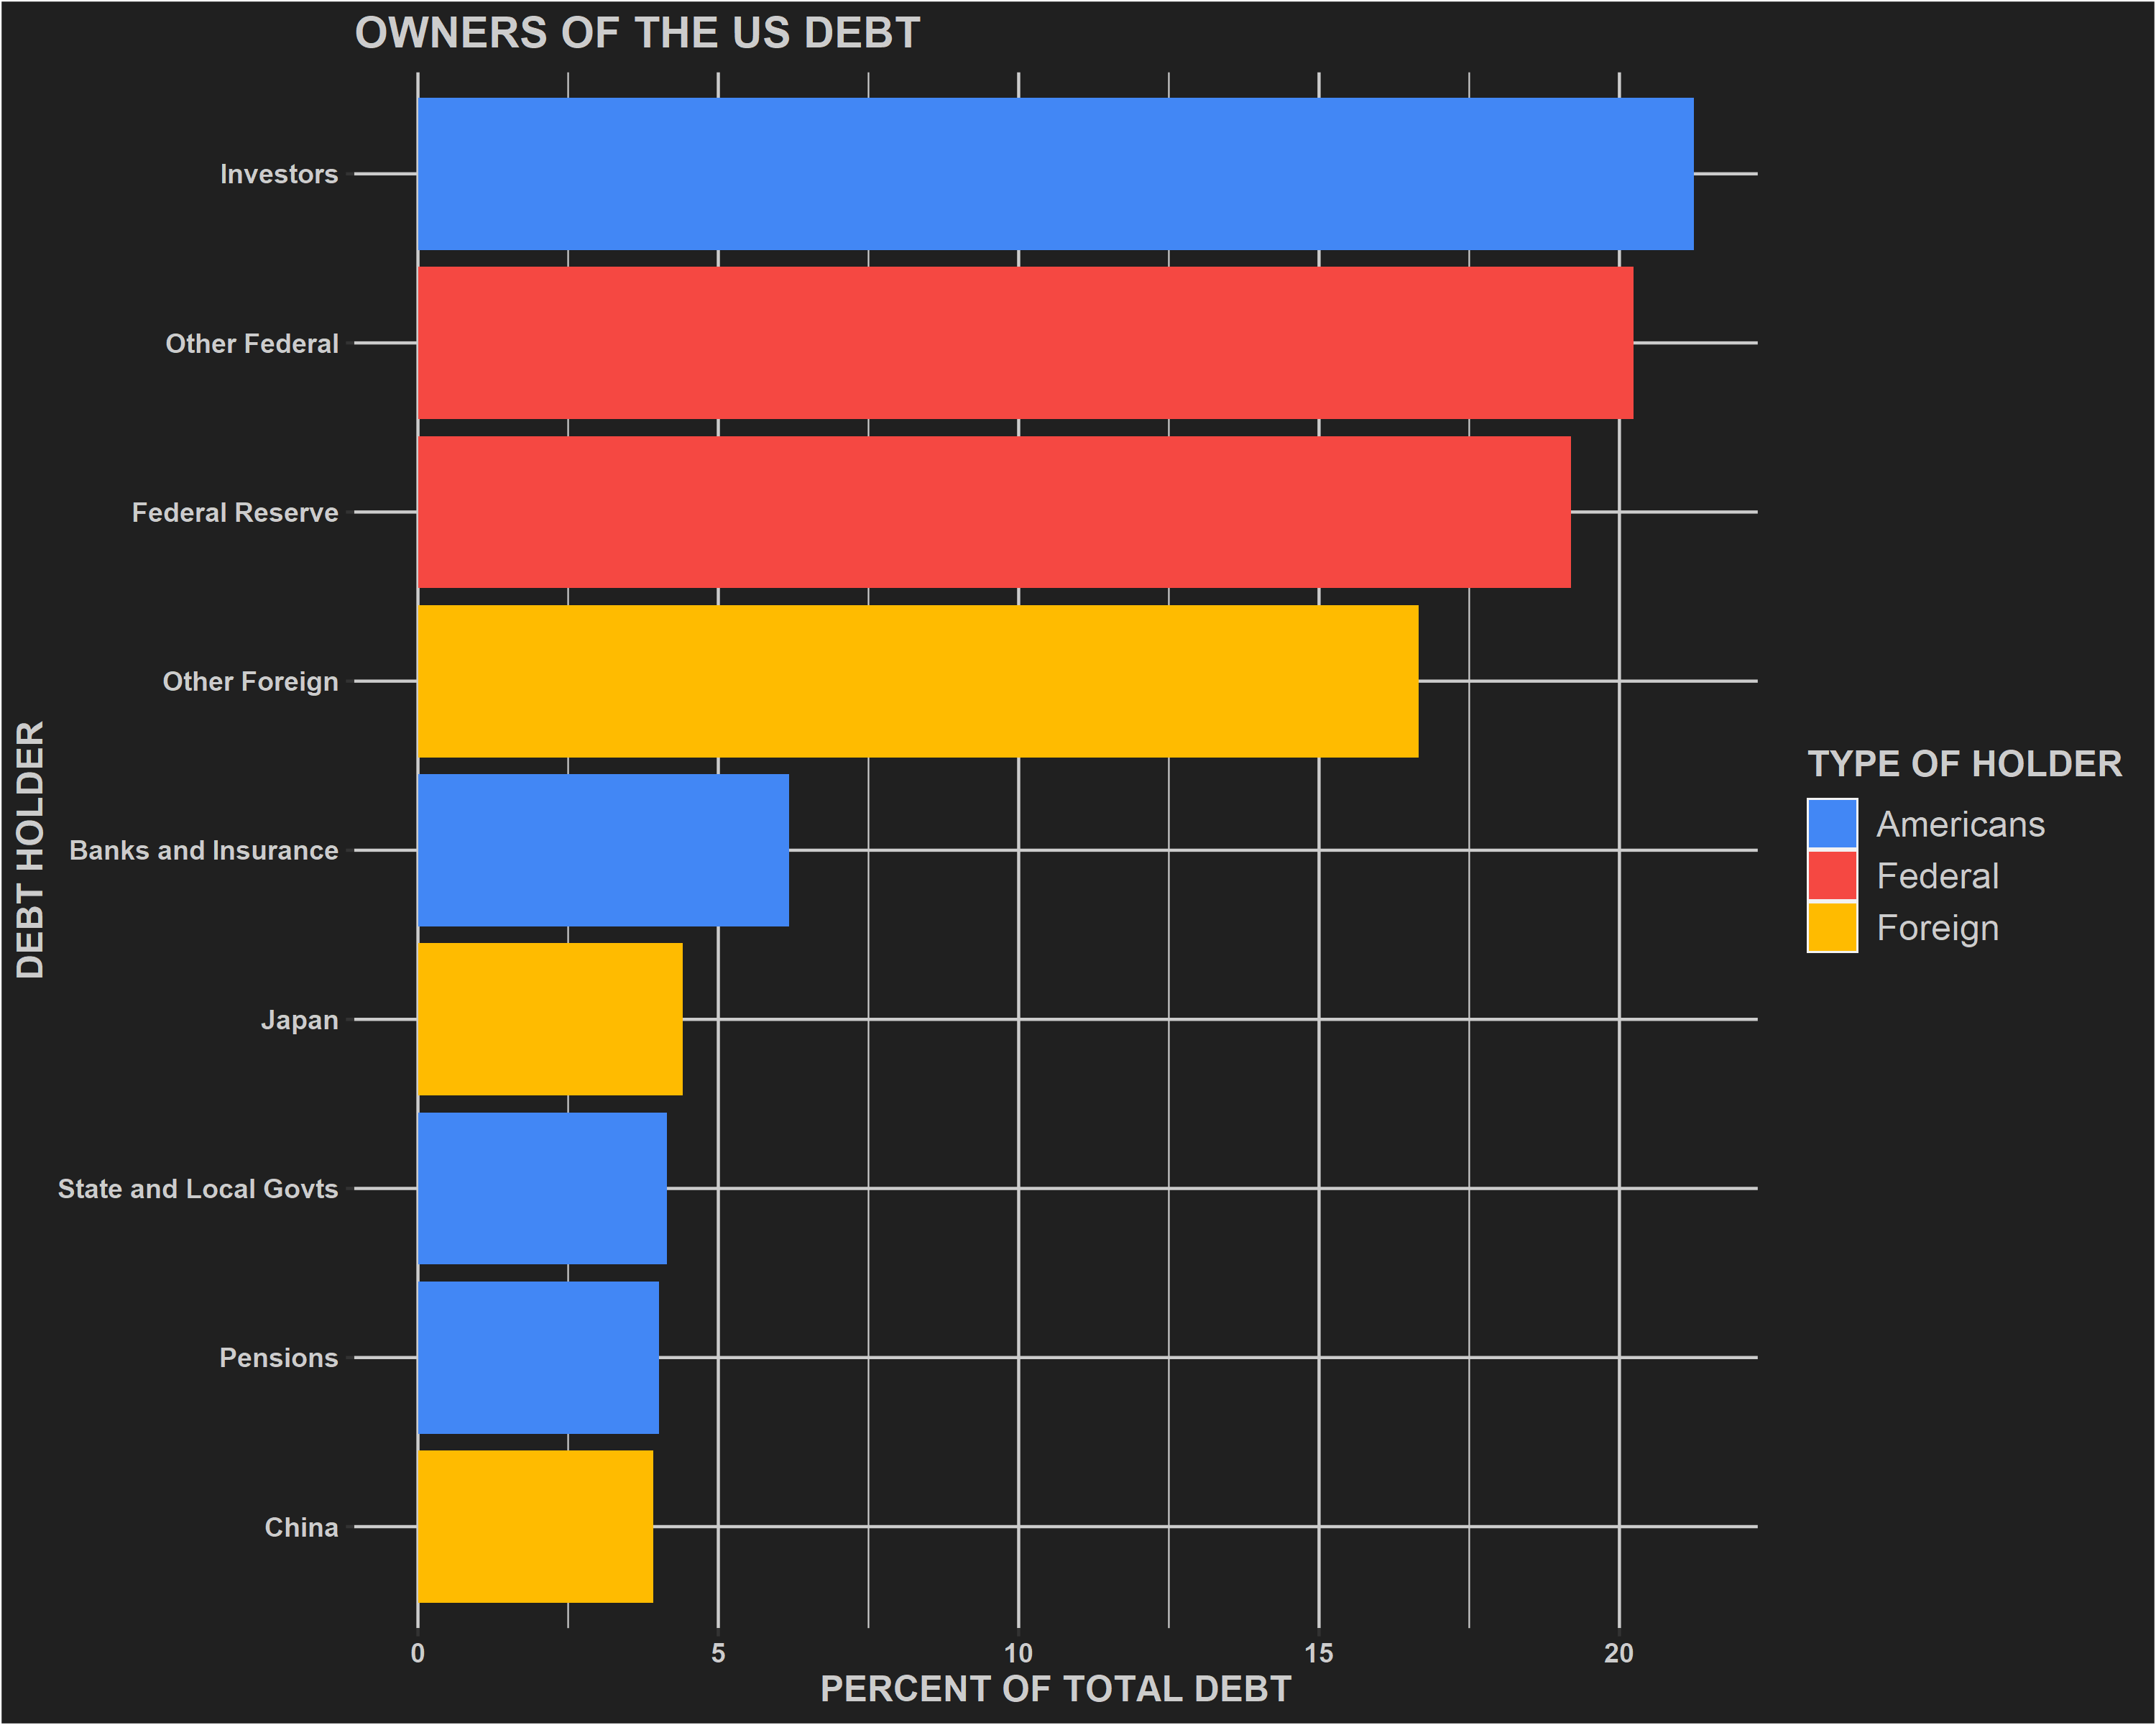

In [43]:
Image(filename="ggplot_bar.png", width=1000, height=800)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv("data.csv", sep = ';', decimal=',')
data['Percentage'] = (data.Amount * 100 / data.Amount.sum()).round(2)
data.sort_values('Percentage', ascending=False, inplace=True)

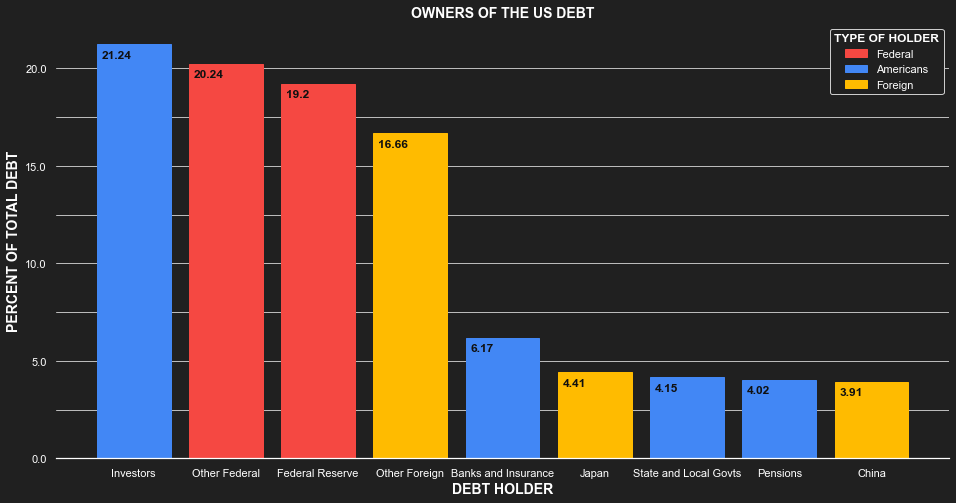

In [177]:
fig, ax = plt.subplots()

# Wykres
color_map = {"Federal":"#f54842", "Americans":"#4287f5", "Foreign":"#ffbb00"}
colors = data.Type.map(color_map)
ax.bar(data.Name, data.Percentage, color = colors, edgecolor=colors)
for i, v in enumerate(data.Percentage):
    ax.text(i-0.35, v - 0.7, str(v), color = "#101010", fontweight="bold", fontsize=12)

# Styl
sns.set(rc = {'figure.figsize': (16,8)})

background_color = "#202020"
ax.set_facecolor(background_color)
fig.set_facecolor(background_color)

ax.xaxis.grid(False)
ax.yaxis.grid(True,color="#bbbbbb")
ax.set_yticks(np.arange(0, 21, 2.5))
for label in ax.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

sns.despine(left=True)

# Legenda

labels = list(color_map.keys())
handles = [plt.Rectangle((0,0),1,1, color=color_map[label]) for label in labels]
legend = ax.legend(handles, labels, title = "TYPE OF HOLDER", facecolor='#202020', framealpha=1)
plt.setp(legend.get_texts(), color="white")
plt.setp(legend.get_title(), color="white", fontweight="bold")

# Etykiety
ax.set_xlabel("DEBT HOLDER", color = "white", fontweight = "bold", fontsize = 14)
ax.set_ylabel("PERCENT OF TOTAL DEBT", color = "white", fontweight = "bold", fontsize = 14)
ax.set_title("OWNERS OF THE US DEBT", color = "white", fontweight = "bold", fontsize = 14)

plt.show()



## Dlaczego wykres jest lepszy?

Przede wszystkim usunięte zostały linie siatki równoległe do słupków. Wcześniej nie były one potrzebne, a jedynie niepotrzebnie zwiększały ilość elementów na wykresie. Ponadto słupki ustawione zostały pionowo, co dla odbiorców może być bardziej intuicyjne i łatwiejsze w szybkiej interpretacji wykresu. Szybka interpretacja jest szczeólnie ważna w trakcie oglądania wykresów na filmiku, jak w przypadku oryginalnego wykresu. Oczywiście film można zatrzymać jednak taka konieczność oznacza źle zaprojektowany wykres. Ze względu na ten fakt dodane zostały dokładne wartości na słupkach, tak, aby odbiorca nie musiał zatrzymywać filmu i samemu odczytywać tych wartości.